In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
#from matplotlib import style
from sklearn import linear_model

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [2]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,1,2,"Bell, Adele",female,62.00,0,0,PC 15008,14.86,D17243,C
99996,99996,0,2,"Brown, Herman",male,66.00,0,0,13273,11.15,NaN,S
99997,99997,0,3,"Childress, Charles",male,37.00,0,0,NaN,9.95,NaN,S
99998,99998,0,3,"Caughlin, Thomas",male,51.00,0,1,458654,30.92,NaN,S


In [3]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,100000,3,"Holliday, Daniel",male,19.0,0,0,24745,63.01,NaN,S
1,100001,3,"Nguyen, Lorraine",female,53.0,0,0,13264,5.81,NaN,S
2,100002,1,"Harris, Heather",female,19.0,0,0,25990,38.91,B15315,C
3,100003,2,"Larsen, Eric",male,25.0,0,0,314011,12.93,NaN,S
4,100004,1,"Cleary, Sarah",female,17.0,0,2,26203,26.89,B22515,C
...,...,...,...,...,...,...,...,...,...,...,...
99995,199995,3,"Cash, Cheryle",female,27.0,0,0,7686,10.12,NaN,Q
99996,199996,1,"Brown, Howard",male,59.0,1,0,13004,68.31,NaN,S
99997,199997,3,"Lightfoot, Cameron",male,47.0,0,0,4383317,10.87,NaN,S
99998,199998,1,"Jacobsen, Margaret",female,49.0,1,2,PC 26988,29.68,B20828,C


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          96708 non-null   float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Cabin        32134 non-null   object 
 11  Embarked     99750 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB


In [5]:
train_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.001956,-0.000893,-0.002654,0.001000,0.000411,-0.001036
Survived,0.001956,1.000000,-0.289723,0.103895,-0.007587,0.023352,0.187534
Pclass,-0.000893,-0.289723,1.000000,-0.259109,-0.051436,-0.041848,-0.417354
Age,-0.002654,0.103895,-0.259109,1.000000,-0.112459,-0.125535,0.109164
SibSp,0.001000,-0.007587,-0.051436,-0.112459,1.000000,0.213126,0.059358
Parch,0.000411,0.023352,-0.041848,-0.125535,0.213126,1.000000,0.061443
Fare,-0.001036,0.187534,-0.417354,0.109164,0.059358,0.061443,1.000000


In [6]:
train_df = train_df.drop(['PassengerId'], axis = 1)

train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
99995,1,2,"Bell, Adele",female,62.00,0,0,PC 15008,14.86,D17243,C
99996,0,2,"Brown, Herman",male,66.00,0,0,13273,11.15,NaN,S
99997,0,3,"Childress, Charles",male,37.00,0,0,NaN,9.95,NaN,S
99998,0,3,"Caughlin, Thomas",male,51.00,0,1,458654,30.92,NaN,S


In [7]:
# drop 'Name' in both train_df and test_df

train_df = train_df.drop(['Name'], axis = 1)

test_df = test_df.drop(['Name'], axis = 1)

In [8]:
# drop 'Ticket' in both train_df and test_df

train_df = train_df.drop(['Ticket'], axis = 1)

test_df = test_df.drop(['Ticket'], axis = 1)

In [9]:
# drop 'Cabin' in both train_df and test_df

train_df = train_df.drop(['Cabin'], axis = 1)

test_df = test_df.drop(['Cabin'], axis = 1)

In [10]:
data = [train_df, test_df]

for S in data:
    S['Sex'] = S['Sex'].replace({'male': '0'})
    S['Sex'] = S['Sex'].replace({'female': '1'})
    
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,0,NaN,2,0,27.14,S
1,0,3,0,NaN,0,0,13.35,S
2,0,3,0,0.33,1,2,71.29,S
3,0,3,0,19.00,0,0,13.04,S
4,1,3,0,25.00,0,0,7.76,S
...,...,...,...,...,...,...,...,...
99995,1,2,1,62.00,0,0,14.86,C
99996,0,2,0,66.00,0,0,11.15,S
99997,0,3,0,37.00,0,0,9.95,S
99998,0,3,0,51.00,0,1,30.92,S


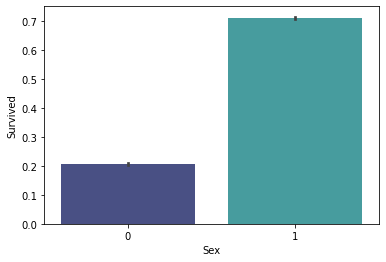

In [11]:
sns.barplot(x = 'Sex', y = 'Survived', palette = 'mako', data = train_df)

In [12]:
train_df.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age         3292
SibSp          0
Parch          0
Fare         134
Embarked     250
dtype: int64

## most null value are Cabin > Age > Embarked > Fare in order

In [13]:
data = [train_df, test_df]

for SP in data:
    SP['#People'] = SP['SibSp'] + SP['Parch']
    #if alone
    SP.loc[SP['#People'] == 0, 'Status'] = 0
    #if have at least one person
    SP.loc[SP['#People'] > 0, 'Status'] = 1   
    SP['Status'] = SP['Status'].astype(int)
    
train_df['Status'].value_counts()

0    61853
1    38147
Name: Status, dtype: int64

In [14]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,#People,Status
0,1,1,0,NaN,2,0,27.14,S,2,1
1,0,3,0,NaN,0,0,13.35,S,0,0
2,0,3,0,0.33,1,2,71.29,S,3,1
3,0,3,0,19.00,0,0,13.04,S,0,0
4,1,3,0,25.00,0,0,7.76,S,0,0
...,...,...,...,...,...,...,...,...,...,...
99995,1,2,1,62.00,0,0,14.86,C,0,0
99996,0,2,0,66.00,0,0,11.15,S,0,0
99997,0,3,0,37.00,0,0,9.95,S,0,0
99998,0,3,0,51.00,0,1,30.92,S,1,1


### replace all null value

In [15]:
train_df['Fare'].describe()

count    99866.00000
mean        43.92933
std         69.58882
min          0.68000
25%         10.04000
50%         24.46000
75%         33.50000
max        744.66000
Name: Fare, dtype: float64

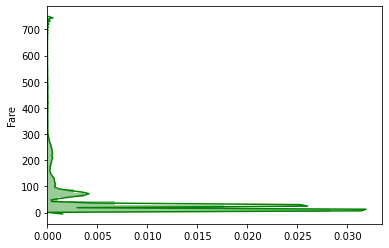

In [16]:
sns.distplot(train_df.Fare, color = 'Green', vertical = 'True') 

In [17]:
#replace null value in 'Fare' with it's mean
mean_fare = train_df['Fare'].mean()

data = [train_df, test_df]

for F in data:
    F['Fare'] = F['Fare'].fillna(mean_fare)
    F['Fare'] = F['Fare'].astype(int)
    
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,#People,Status
0,1,1,0,NaN,2,0,27,S,2,1
1,0,3,0,NaN,0,0,13,S,0,0
2,0,3,0,0.33,1,2,71,S,3,1
3,0,3,0,19.00,0,0,13,S,0,0
4,1,3,0,25.00,0,0,7,S,0,0
...,...,...,...,...,...,...,...,...,...,...
99995,1,2,1,62.00,0,0,14,C,0,0
99996,0,2,0,66.00,0,0,11,S,0,0
99997,0,3,0,37.00,0,0,9,S,0,0
99998,0,3,0,51.00,0,1,30,S,1,1


In [18]:
#'Fare' have an outlier so we will mainly focus in range of 0-105 
data = [train_df, test_df]

for F in data:
    F['Fare'] = F['Fare'].astype(int)
    F.loc[ F['Fare'] <= 15, 'Fare'] = 0 
    F.loc[(F['Fare'] > 15) & (F['Fare'] <= 30), 'Fare'] = 1 
    F.loc[(F['Fare'] > 30) & (F['Fare'] <= 45), 'Fare'] = 2 
    F.loc[(F['Fare'] > 45) & (F['Fare'] <= 60), 'Fare'] = 3 
    F.loc[(F['Fare'] > 60) & (F['Fare'] <= 75), 'Fare'] = 4 
    F.loc[(F['Fare'] > 75) & (F['Fare'] <= 90), 'Fare'] = 5 
    F.loc[(F['Fare'] > 90) & (F['Fare'] <= 105), 'Fare'] = 6 
    F.loc[ F['Fare'] > 105, 'Fare'] = 7

train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,#People,Status
0,1,1,0,NaN,2,0,1,S,2,1
1,0,3,0,NaN,0,0,0,S,0,0
2,0,3,0,0.33,1,2,4,S,3,1
3,0,3,0,19.00,0,0,0,S,0,0
4,1,3,0,25.00,0,0,0,S,0,0
...,...,...,...,...,...,...,...,...,...,...
99995,1,2,1,62.00,0,0,0,C,0,0
99996,0,2,0,66.00,0,0,0,S,0,0
99997,0,3,0,37.00,0,0,0,S,0,0
99998,0,3,0,51.00,0,1,1,S,1,1


In [19]:
train_df['Embarked'].describe()

count     99750
unique        3
top           S
freq      72139
Name: Embarked, dtype: object

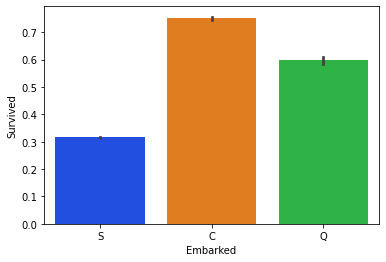

In [20]:
sns.barplot(x = 'Embarked', y = 'Survived', palette = 'bright', data = train_df)

In [21]:
#top value of 'Embarked' is 'S'
top_embarked = 'S'
data = [train_df, test_df]

for E in data:
    E['Embarked'] = E['Embarked'].fillna(top_embarked)
    
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,#People,Status
0,1,1,0,NaN,2,0,1,S,2,1
1,0,3,0,NaN,0,0,0,S,0,0
2,0,3,0,0.33,1,2,4,S,3,1
3,0,3,0,19.00,0,0,0,S,0,0
4,1,3,0,25.00,0,0,0,S,0,0
...,...,...,...,...,...,...,...,...,...,...
99995,1,2,1,62.00,0,0,0,C,0,0
99996,0,2,0,66.00,0,0,0,S,0,0
99997,0,3,0,37.00,0,0,0,S,0,0
99998,0,3,0,51.00,0,1,1,S,1,1


In [22]:
#set 'Embarked' group
data = [train_df, test_df]

for E in data:
    E['Embarked'] = E['Embarked'].replace({'C': '0'})
    E['Embarked'] = E['Embarked'].replace({'S': '1'})
    E['Embarked'] = E['Embarked'].replace({'Q': '2'})
    
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,#People,Status
0,1,1,0,NaN,2,0,1,1,2,1
1,0,3,0,NaN,0,0,0,1,0,0
2,0,3,0,0.33,1,2,4,1,3,1
3,0,3,0,19.00,0,0,0,1,0,0
4,1,3,0,25.00,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
99995,1,2,1,62.00,0,0,0,0,0,0
99996,0,2,0,66.00,0,0,0,1,0,0
99997,0,3,0,37.00,0,0,0,1,0,0
99998,0,3,0,51.00,0,1,1,1,1,1


In [23]:
train_df['Age'].describe()

count    96708.000000
mean        38.355472
std         18.313556
min          0.080000
25%         25.000000
50%         39.000000
75%         53.000000
max         87.000000
Name: Age, dtype: float64

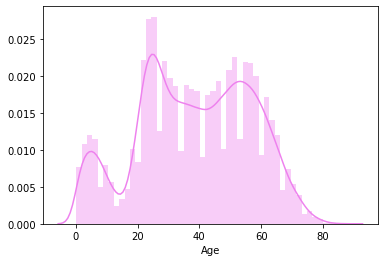

In [24]:
sns.distplot(train_df.Age, color = 'Violet') 

In [25]:
#replace null value in 'Age' with it's mean
mean_age = round(train_df['Age'].mean()) 

data = [train_df, test_df]

for A in data:
    A['Age'] = A['Age'].fillna(mean_age)
    
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,#People,Status
0,1,1,0,38.00,2,0,1,1,2,1
1,0,3,0,38.00,0,0,0,1,0,0
2,0,3,0,0.33,1,2,4,1,3,1
3,0,3,0,19.00,0,0,0,1,0,0
4,1,3,0,25.00,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
99995,1,2,1,62.00,0,0,0,0,0,0
99996,0,2,0,66.00,0,0,0,1,0,0
99997,0,3,0,37.00,0,0,0,1,0,0
99998,0,3,0,51.00,0,1,1,1,1,1


In [26]:
#set 'Age' group max age = 87
data = [train_df, test_df]

for A in data:
    A['Age'] = A['Age'].astype(int)
    A.loc[ A['Age'] <= 20, 'Age'] = 0 #child
    A.loc[(A['Age'] > 20) & (A['Age'] <= 40), 'Age'] = 1 #teenager
    A.loc[(A['Age'] > 40) & (A['Age'] <= 60), 'Age'] = 2 #adult
    A.loc[(A['Age'] > 60) & (A['Age'] <= 80), 'Age'] = 3 #old person
    A.loc[ A['Age'] > 80, 'Age'] = 4 #very old

train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,#People,Status
0,1,1,0,1,2,0,1,1,2,1
1,0,3,0,1,0,0,0,1,0,0
2,0,3,0,0,1,2,4,1,3,1
3,0,3,0,0,0,0,0,1,0,0
4,1,3,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
99995,1,2,1,3,0,0,0,0,0,0
99996,0,2,0,3,0,0,0,1,0,0
99997,0,3,0,1,0,0,0,1,0,0
99998,0,3,0,2,0,1,1,1,1,1


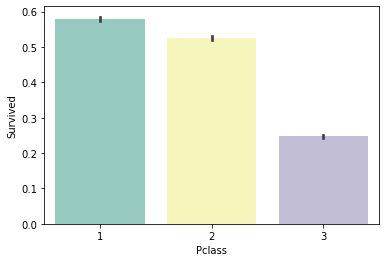

In [27]:
sns.barplot(x = 'Pclass', y = 'Survived', palette = 'Set3', data = train_df)

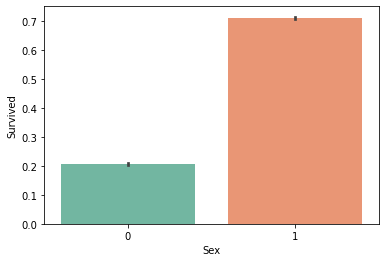

In [28]:
sns.barplot(x = 'Sex', y = 'Survived', palette = 'Set2', data = train_df)

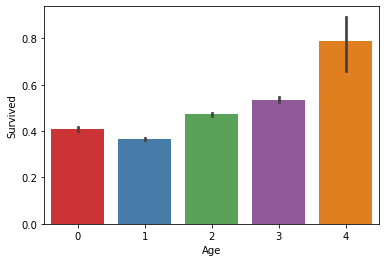

In [29]:
sns.barplot(x = 'Age', y = 'Survived', palette = 'Set1', data = train_df)

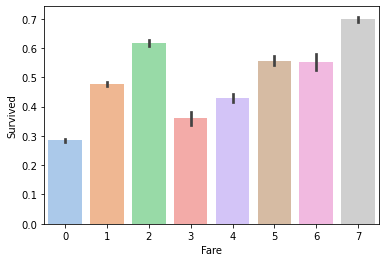

In [30]:
sns.barplot(x = 'Fare', y = 'Survived', palette = 'pastel', data = train_df)

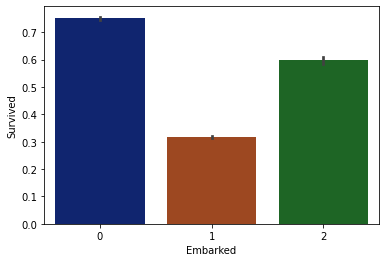

In [31]:
sns.barplot(x = 'Embarked', y = 'Survived', palette = 'dark', data = train_df)

## -- GENERATE MODEL --

In [32]:
X = train_df.drop(columns = ['Survived']).values
y = train_df["Survived"]

print(X.shape, y.shape)

(100000, 9) (100000,)


In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.20)

X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, random_state = 42, test_size = 0.50)

print(f'Training set: {X_train.shape}, {y_train.shape}')
print(f'Validation set: {X_valid.shape}, {y_valid.shape}')
print(f'Test set: {X_test.shape}, {y_test.shape}')

Training set: (80000, 9), (80000,)
Validation set: (10000, 9), (10000,)
Test set: (10000, 9), (10000,)


### DecisionTreeClassifier

In [34]:
# Create a decision tree model, named model, using DecisionTreeClassifier 
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", np.mean(y_pred == y_test))

Accuracy: 0.7622


### RandomForest

In [35]:
# Create a random forest model, named model, using RandomForest 
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 100)

clf.fit(X_train,y_train)

from sklearn import metrics

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7622


### LogisticRegression

In [36]:
# Create a logistic regression model, named model, using LogisticRegression 
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver = 'liblinear', random_state = 42)

model.fit(X_train,y_train)

print("Accuracy:", model.score(X_train,y_train))

Accuracy: 0.7610625


### KNN

In [37]:
# Create a K-nearest neighbors model, named model, using KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 7) 

model.fit(X_train, y_train)  

print("Accuracy:", model.score(X_train,y_train))

Accuracy: 0.76375


### The Naive Bayes 

In [38]:
# Create the Naive Bayes model, named model, using GaussianNB 
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X_train, y_train)  
 
print("Accuracy:", model.score(X_train,y_train))

Accuracy: 0.7527375


### Perceptron

In [39]:
# Create the Perceptron model, named model, using Perceptron 
from sklearn.linear_model import Perceptron 

model = Perceptron(max_iter = 1000)

model.fit(X_train, y_train)

print("Accuracy:", model.score(X_train,y_train))

Accuracy: 0.740975


 ### SGD

In [40]:
# Create the SGD model, named model, using SGDClassifier
from sklearn.linear_model import SGDClassifier

model = linear_model.SGDClassifier(max_iter = 7, tol = None)

model.fit(X_train, y_train)

print("Accuracy:", model.score(X_train,y_train))

Accuracy: 0.75445


### GradientBoosting

In [41]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators = 100)

clf.fit(X_train,y_train)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7622


### MLP

In [42]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(random_state = 1, max_iter = 300)

model.fit(X_train, y_train)

print("Accuracy:", model.score(X_train,y_train)) 

Accuracy: 0.7734375


In [43]:
test_file  = test_df.drop("PassengerId", axis = 1).copy()

## ^^ we choose MLP Classifier to be our model

In [44]:
select_model = MLPClassifier(random_state = 1, max_iter = 300)

select_model.fit(X_train, y_train)

y_pred = select_model.predict(test_file) #prediction answer

accuracy_select_model = round(select_model.score(X_train,y_train) * 100, 2) 
print(round(accuracy_select_model,2,), "%")

77.34 %


In [45]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

prediction = cross_val_predict(select_model, X_train, y_train, cv = 3)
confusion_matrix(y_train, prediction)

array([[36207,  9488],
       [ 8841, 25464]], dtype=int64)

In [46]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(y_train, prediction))
print("Recall:",recall_score(y_train, prediction))

from sklearn.metrics import f1_score

print("F1-Score:",f1_score(y_train, prediction))

Precision: 0.7285420004577706
Recall: 0.7422824661128116
F1-Score: 0.7353480514605023


In [60]:
df = pd.read_csv("sample_submission.csv")

for y in y_pred: write.writerow([y])
    
df["Survived"] =  pd.DataFrame(y_pred)

df.to_csv("sample_submission.csv", index = False)